## Table of Contents

#### 1. Importing Libraries
#### 2. Loading and Pre-processing Weather Images
#### 3. Create the CNN model
#### 4. Compiling and Running
#### 5. Results

### 1. Importing Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

### 2. Loading and Pre-processing Weather Images

In [41]:
#turning off warning feature
warnings.filterwarnings('ignore')

#download the weather images and put them in a directory
path = r'C:\Users\sorca\Documents\3ML-2_5\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [42]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


### 3. Create the CNN Model

In [44]:
# This is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

### 4. Compiling and Running the CNN Model

In [98]:
# How many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 14,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/14
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 390ms/step - accuracy: 0.9098 - loss: 0.0344 - val_accuracy: 0.8839 - val_loss: 0.0483
Epoch 2/14
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9688 - loss: 0.0199 - val_accuracy: 0.8795 - val_loss: 0.0487
Epoch 3/14
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 391ms/step - accuracy: 0.9154 - loss: 0.0300 - val_accuracy: 0.8705 - val_loss: 0.0550
Epoch 4/14
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9688 - loss: 0.0255 - val_accuracy: 0.8616 - val_loss: 0.0560
Epoch 5/14
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 402ms/step - accuracy: 0.9571 - loss: 0.0178 - val_accuracy: 0.8839 - val_loss: 0.0484
Epoch 6/14
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9688 - loss: 0.0131 - val_accuracy: 0.8973 - val_loss: 0.0471
Epoch 7/14
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 400ms/step - accuracy: 0.9450 - loss: 0.0212 - val_accuracy: 0.8750 - val_loss: 0.0546
Epoch 8/14
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9688 - loss: 0.0170 - val_accuracy: 0.

### 5. Results

In [100]:
results = pd.DataFrame(model.history.history)

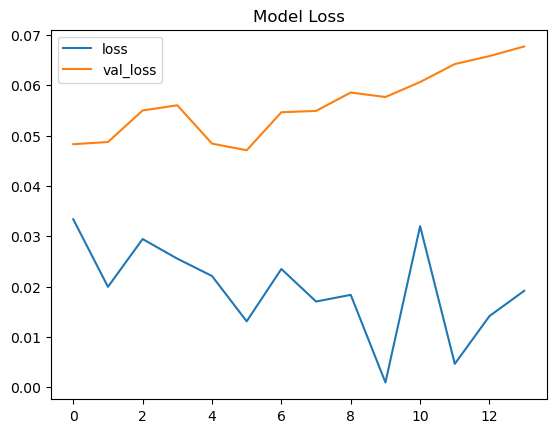

In [101]:
results[['loss','val_loss']].plot(title='Model Loss')
path_graphs = r'C:\Users\sorca\Documents\3ML-2_5'
plt.savefig(os.path.join(path_graphs, 'loss.png'))

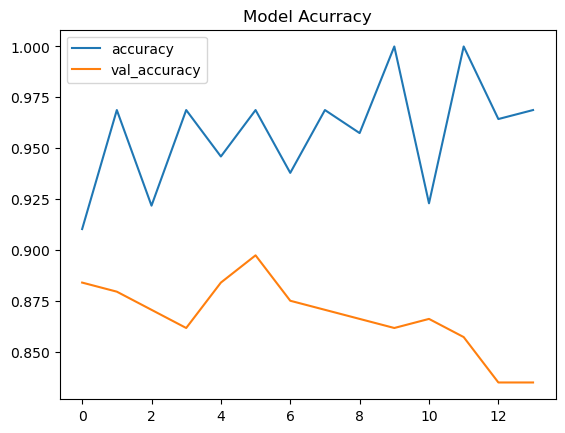

In [102]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig(os.path.join(path_graphs, 'accuracy.png'))

In [115]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.96875, Val_Accuracy: 0.8348214030265808
Loss: 0.01914031058549881, Val_Loss: 0.06770431250333786


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


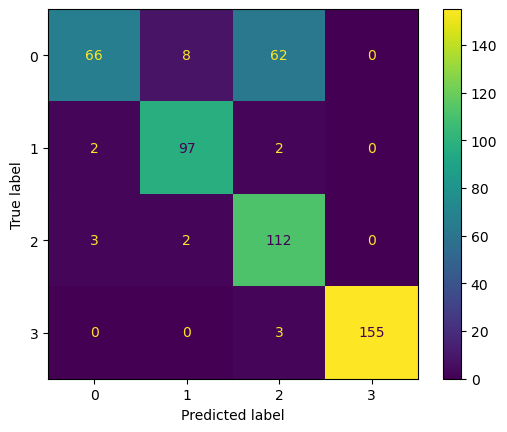

In [117]:
# Collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 15 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

# Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [119]:
# This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


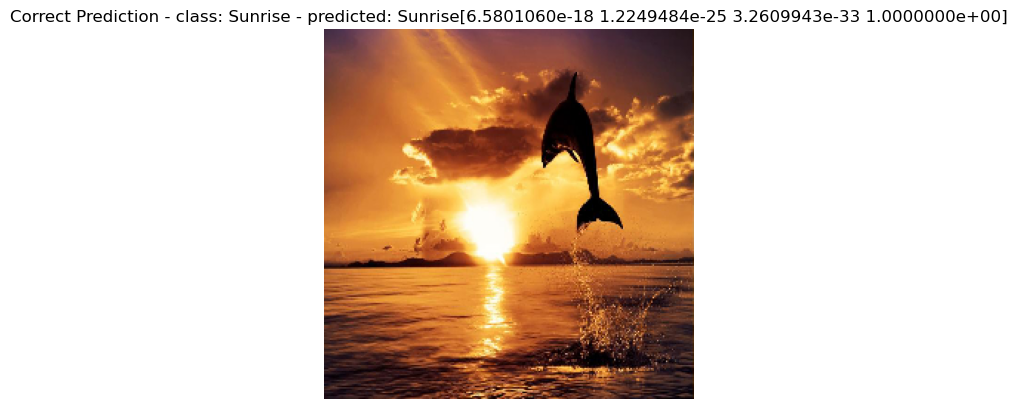

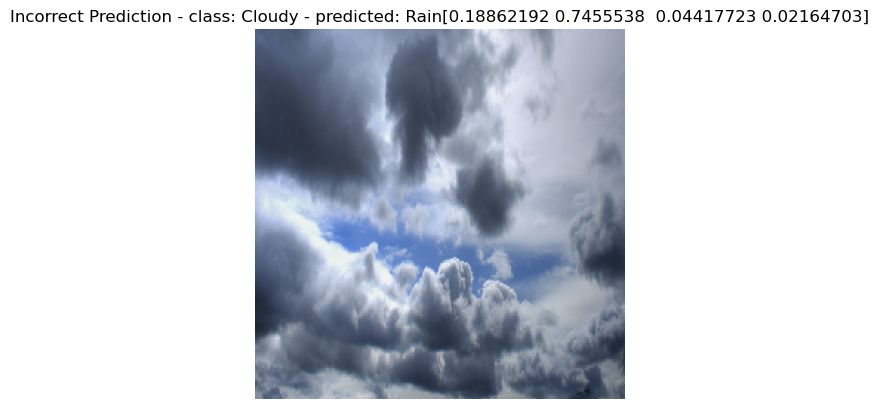

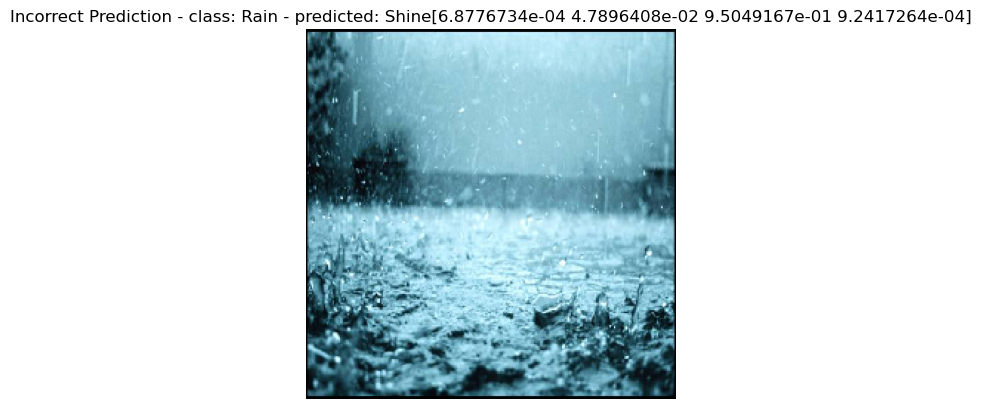

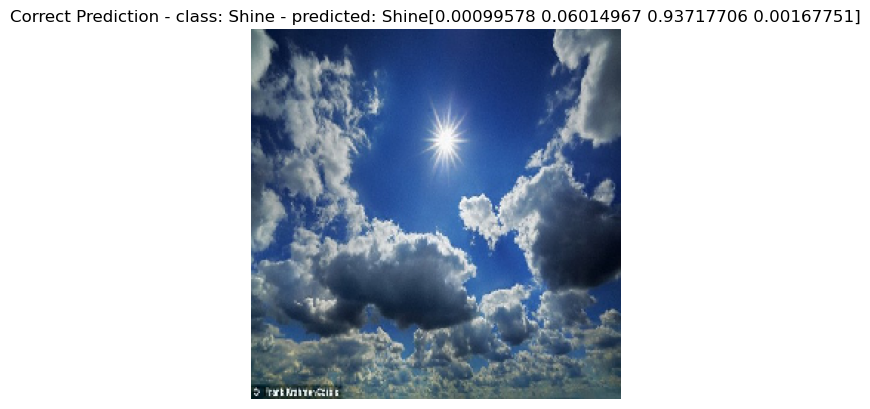

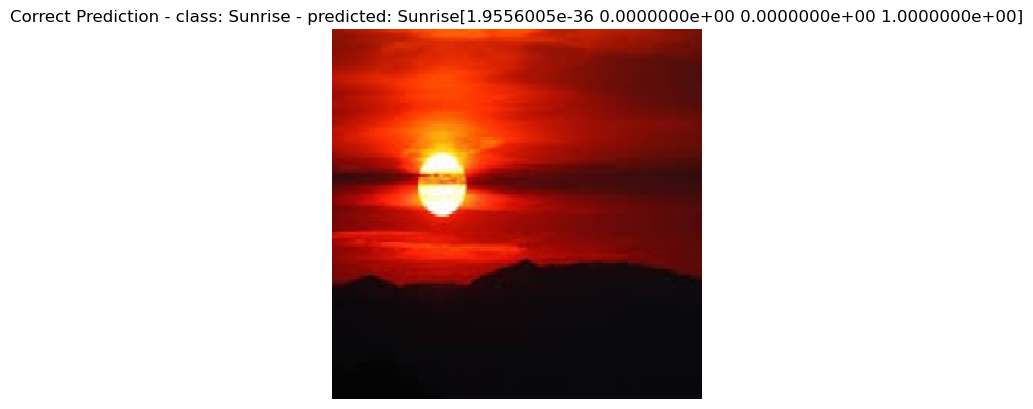

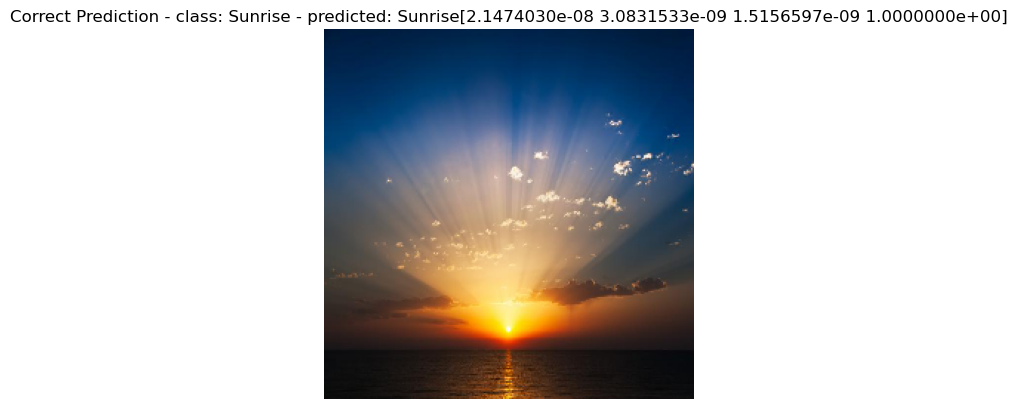

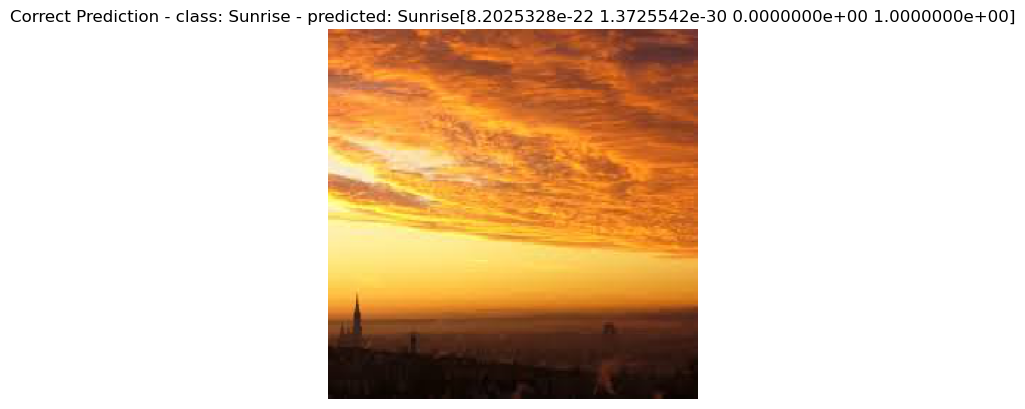

In [123]:
predict_one(model, 7) #<--you can show multiple pictures with this command. Just fill in the number you want to see.